In [ ]:
# importing libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [6]:
# changing TotalCharges from object to float

# Assuming 'df' is your DataFrame and 'TotalCharges' is the column name
missing_values_count = df['TotalCharges'].isnull().sum()
missing_values_count


0

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:>

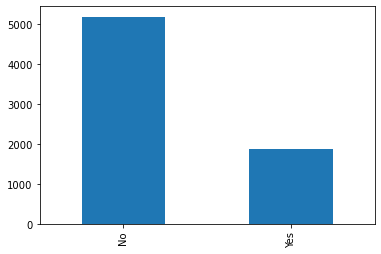

In [10]:
df['Churn'].value_counts().plot(kind = "bar")

In [60]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

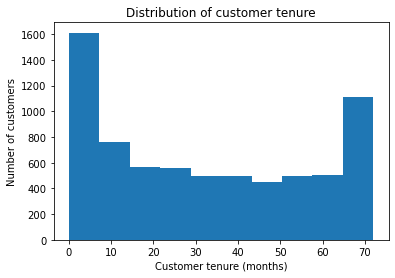

In [61]:
# distribution of tenure
plt.hist(df['tenure'])
plt.xlabel('Customer tenure (months)')
plt.ylabel('Number of customers')
plt.title('Distribution of customer tenure')
plt.show()

# 1.Investigate the relationship between contract and churn

In [63]:
pd.crosstab(df.Contract,df.Churn).T

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [64]:
contract_churn_counts=df.groupby(['Contract','Churn']).size().unstack()
contract_churn_counts

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


# Insights
* As you can see, the churn rate is highest for customers with 1 month contracts, followed by customers with 1 year contracts. The churn rate is lowest for customers with 2 year contracts.
* There is a possibility is that customers who sign up for 1 month contracts are less committed to the product or service. They may be more likely to try it out for a month and then cancel if they are not satisfied.
* Another possibility is that customers who sign up for 1 month contracts are more price-sensitive. They may be more likely to churn if they find a better deal elsewhere.

# 2. Analyze the relationship between gender and churn

In [19]:
churn_rates=df.groupby(['Churn','gender']).size().unstack()
churn_rates


gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


In [ ]:
# Females are more likely to churn than females but the difference is minimal.

# 3.Investigating the relationship between Total Charges and churn

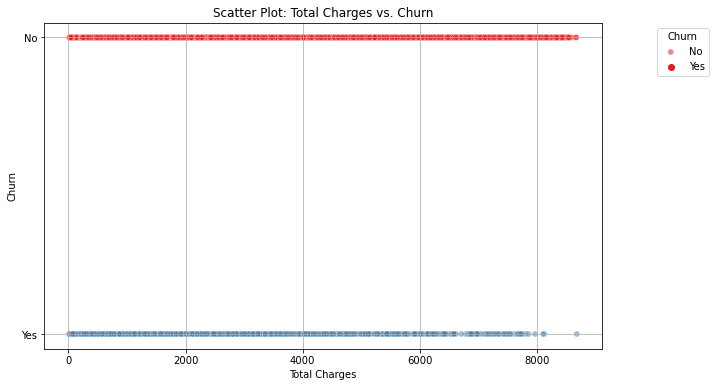

In [77]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.scatterplot(data=df, x='TotalCharges', y='Churn', hue='Churn', palette='Set1', alpha=0.5)
plt.xlabel('Total Charges')
plt.ylabel('Churn')
plt.title('Scatter Plot: Total Charges vs. Churn')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'], bbox_to_anchor=(1.2, 1.0))  
plt.grid(True)  
plt.show()

In [ ]:
# People who receive more TotalCharges are likely to churn

# 4 Identifying the relationship between tenure and churn

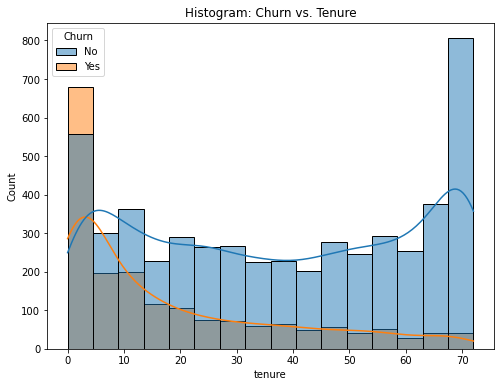

In [87]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tenure', hue='Churn',kde=True)
plt.xlabel('tenure')
plt.ylabel('Count')
plt.title('Histogram: Churn vs. Tenure')
plt.show()

In [ ]:
# Customers with shorter tenures are more likely to churn as shown by the dip in the graph

# 5. Which demographics have proven to be the most popular with the telco brand?

Demographics = SeniorCitizen, Gender, Dependents,Partner

In [6]:
#From the EDA above we can see that only SeniorCitizen is in binary form. We replace the values to be in yes,no format to have consistency
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:'Yes',0:'No'})

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

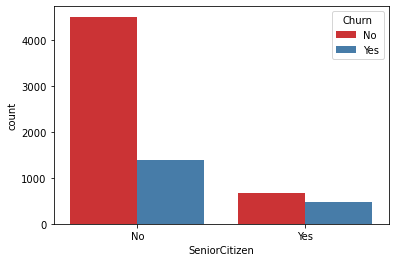

In [12]:
sns.countplot(x='SeniorCitizen', hue = 'Churn', data = df,palette='Set1')

Dependants

<AxesSubplot:xlabel='Dependents', ylabel='count'>

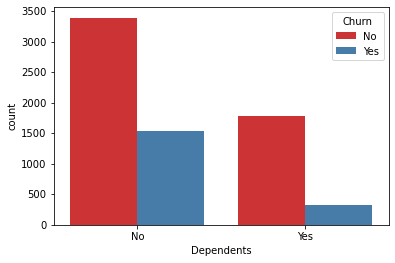

In [13]:
sns.countplot(x='Dependents', hue = 'Churn', data = df, palette='Set1')

Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

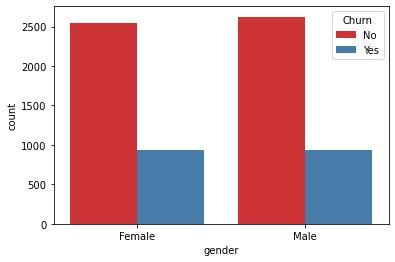

In [15]:
sns.countplot(x='gender', hue = 'Churn', data = df, palette='Set1')

Patrner

<AxesSubplot:xlabel='Partner', ylabel='count'>

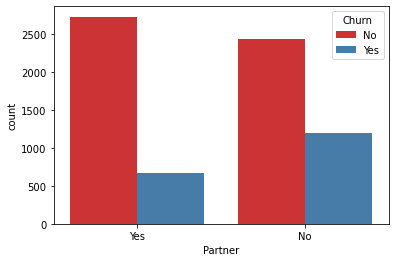

In [17]:
sns.countplot(x='Partner', hue = 'Churn', data = df, palette='Set1')

### Conclusion
Both genders are equally distributed thus wont be considered for question 1.
Older generation, people with dependants are likely to churn. 

# 6: If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

From the countplot above considering the ratio of retained versus churned customers per demographic group it is clear that:
The younger generation
Individuals with dependents 
Individuals with partners 
make for the best target audience for the marketing team

# 7. Which 3 services are contributing to a higher monthly charge and resulting to customers churning?

Services = PhoneService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

For this question we need to dummy encode all categorical variables in order to find the correlation between all variables

In [14]:
# Drop CustomerID as it is also considered a categorical variable 
df_new = df.drop(['customerID'], axis=1)

In [15]:
#Converting churn in a binary numeric variable
df_new['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_new['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [16]:
df_dummies = pd.get_dummies(df_new)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

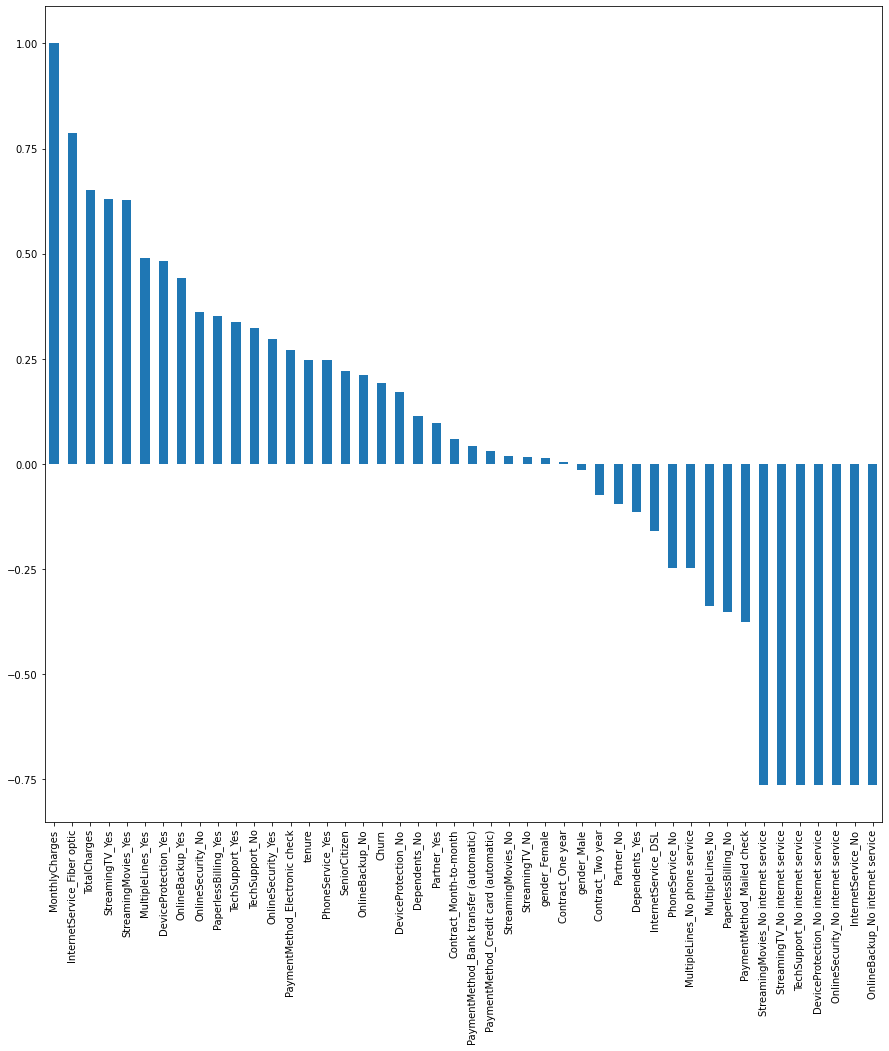

In [17]:
#We proceed to find all variables having a correlation with churn while keeping an eye on the services
#correlation barplots
plt.figure(figsize=(15,15))
df_dummies.corr()['MonthlyCharges'].sort_values(ascending = False).plot(kind='bar')

From the above we can see that the top services contributing to high monthly rates are:

Fiber Optic Internet Service
StreamingTV
StreamingMovies

But do they contribute to churn

<AxesSubplot:>

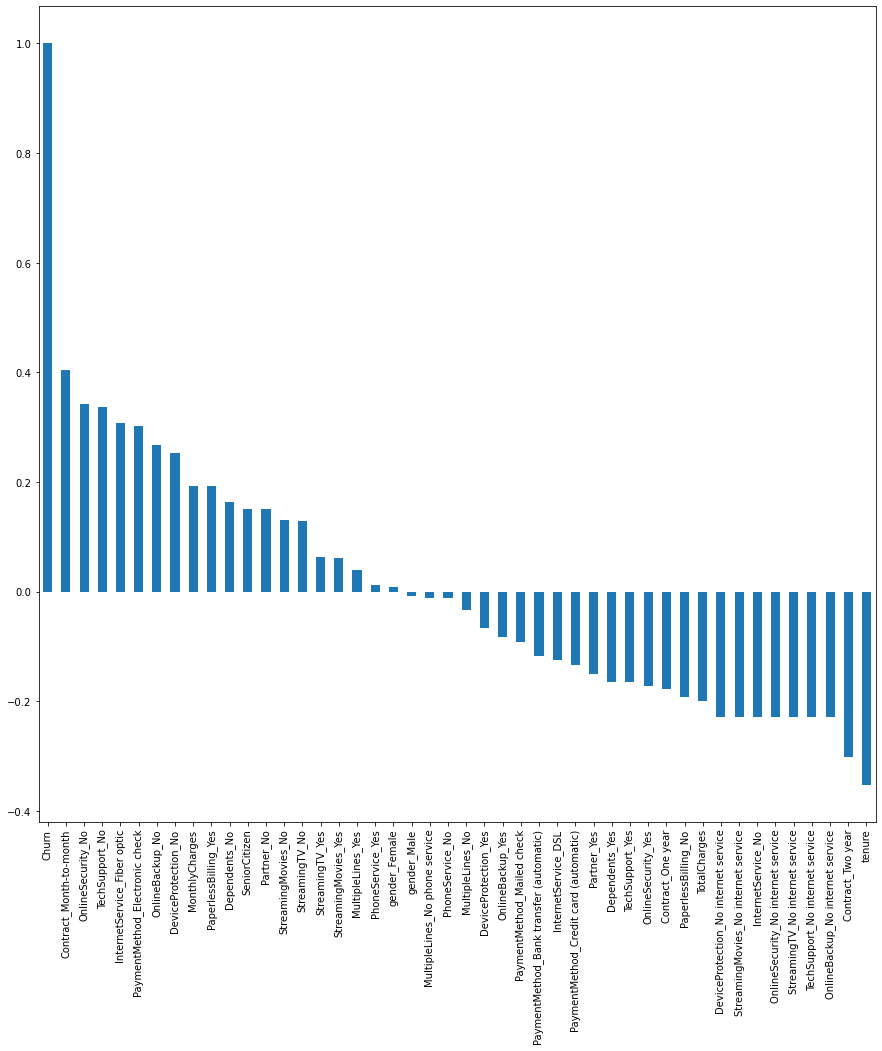

In [18]:
plt.figure(figsize=(15,15))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

We can say that the following services have contribute to high churn rate:

         No Online Security
         No Tech Support
         FiberOptic Internet Service

But only Fiber Optic Internet service contributes to a high monthly charge

# 8. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?¶

In [19]:
# First we have to find out what phone services entail
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [20]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

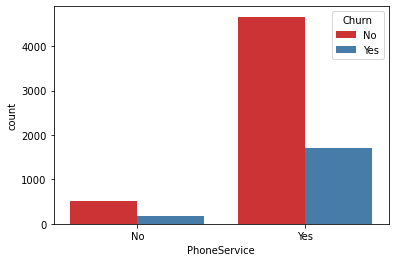

In [22]:
# We then proceed to find the relationship between Phone Services and Churn
sns.countplot(x='PhoneService', hue = 'Churn',palette='Set1',data = df)

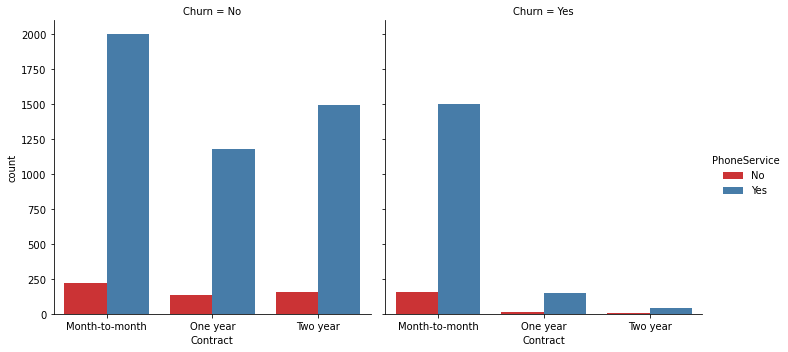

In [26]:
# we also consider the contract type
sns.catplot(x="Contract", hue="PhoneService", col="Churn",data=df,palette='Set1', kind="count")

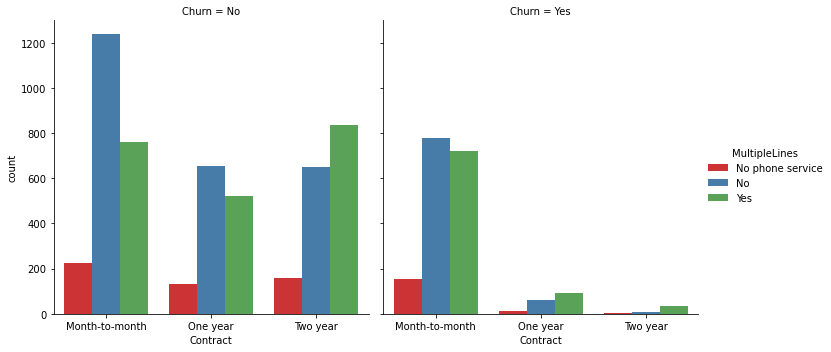

In [25]:
#We now consider Multiple lines to see the distribution of various phone services
sns.catplot(x="Contract", hue="MultipleLines", col="Churn",data=df, palette='Set1', kind="count")

People who have two year contracts with multiple lines have the highest customer retention.

# 9.Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

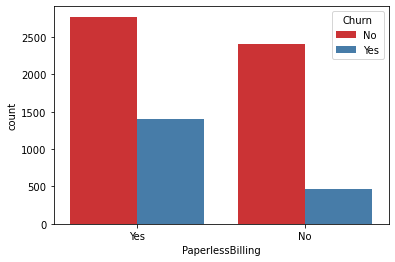

In [27]:
sns.countplot(x='PaperlessBilling', hue = 'Churn',palette='Set1',data = df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

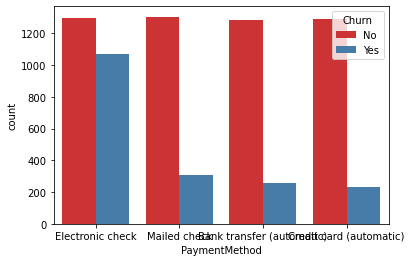

In [28]:
sns.countplot(x='PaymentMethod', hue = 'Churn',palette='Set1',data = df)

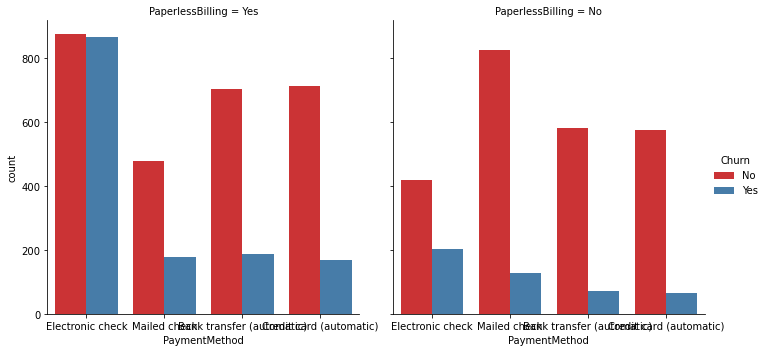

In [29]:
sns.catplot(x="PaymentMethod", col='PaperlessBilling', hue="Churn",data= df,palette='Set1', kind="count")

In [ ]:
# The company should not go for paperless billing as it contributes to a high churn rate